# Essential Machine Learning for Physicists

<p align="right">
  <img src="../../misc/tum-logo.png" width="93" align="right" />
  <img src="../../misc/sixt-logo.png" width="70" align="right" /> 
<left><em>&copy; Zinonas Zinonos</em></left>
    
<left><em>For more information, visit <a href='https://github.com/zinon/essential-machine-learning-for-physicists'>essential-machine-learning-for-physicists</a></em></left>.
___
</p>

# Task Description
In this task, we will use scikit-learn to recognize images of hand-written digits, from 0 to 9.

The digits dataset consists of 8x8 pixel images of digits. The images attribute of the dataset stores 8x8 arrays of grayscale values for each image. We will use these arrays to visualize the first 4 images. 

In [1]:
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets

In [52]:
digits = datasets.load_digits()

In [53]:
digits.images.shape

(1797, 8, 8)

`digits.image` is an array with 3 dimensions. The first dimension indexes images, and we see that we have 1797 images in total. The next two dimensions correspond to the x and y coordinates of the pixels in each image. Each image has 8x8 = 64 pixels. In other words, this array could be represented in 3D as a pile of images with 8x8 pixels each.

Let's look at the data of the first 8x8 image. Each slot in the array corresponds to a pixel, and the value in the slot is the amount of black in the pixel

In [54]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

Now let's display this image.

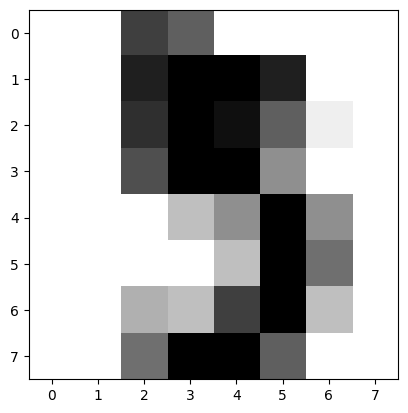

In [6]:
plt.imshow(digits.images[5],cmap='binary');

The image is low resolution. The original digits were of much higher resolution, and the resolution has been decreased when creating the dataset for scikit-learn to make it easier and faster to train a machine learning algorithm to recognize these digits.

Let's now investigate the target attribute:

In [7]:
digits.target.shape

(1797,)

In [8]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [9]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

It is a 1-dimensional array with 1797 slots. Looking into the array, we see that it contains the true numbers corresponding to each image. For example, the first target is 0, and corresponds to the image drawn just above.

The target attribute of the dataset stores the digit each image represents and this is included in the title of the 4 plots below.

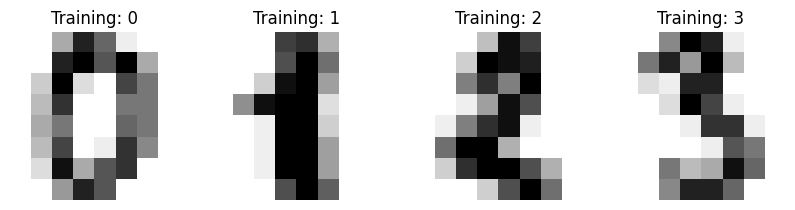

In [10]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

We can also have a look at some more images using this handy function:

In [11]:
def plot_multi(i, digits):
    '''Plots 16 digits, starting with digit i'''
    nplots = 16
    fig = plt.figure(figsize=(10,10))
    for j in range(nplots):
        plt.subplot(4,4,j+1)
        plt.imshow(digits.images[i+j], cmap='binary')
        plt.title(digits.target[i+j])
        plt.axis('off')
    plt.show()

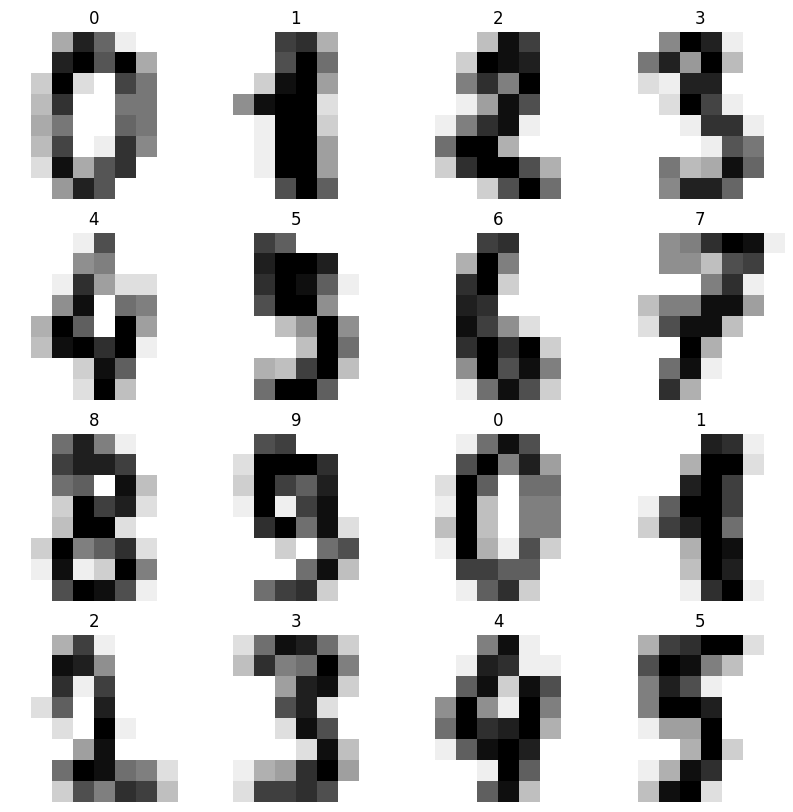

In [12]:
plot_multi(0, digits=digits)

You can have a look at the next digits by calling `plot_multi(16, ...)`, `plot_multi(32, ...)`, etc. 

You will probably see that with such a low resolution, it's quite difficult to recognize some of the digits, even for a human. In these conditions, our classifiers will also be limited by the low quality of the input images. Can the Gaussian NB perform at least as well as a human? It would already be an achievement!

# Data Preparation

Prepare your train and test sets. Assign a 30% of the digits dataset to the test set.

One step before splitting the dataset and training models  is the following.
To apply a classifier on this data, we need to flatten the images, turning each 2-D array of grayscale values from shape (8, 8) into shape (64,). Subsequently, the entire dataset will be of shape (`number of samples`, `number of features`), where the first number is the number of images and the second is the total number of pixels in each image.

Therefore, following the instructions below to reshape your data:
- get the number of samples from your digits' images
- use this number to flatten the digit images into a shape with size `(number of sample, -1)`
- assing the result to `data` and use that in your `train_test_split`
- remain calm; the future belongs to you

Make sure that your initial, input data dimensions `(1797, 8, 8)` now become `(1797, 64)`.

We can then split the data into train and test subsets and fit our classifiers on the train samples.

In [13]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.3, shuffle=False)

In [16]:
X_train.shape, y_train.shape

((1257, 64), (1257,))

In [17]:
X_test.shape, y_test.shape

((540, 64), (540,))

# Classification

We want to compare the following three classifiers:
- Support Vector Classifier with $\gamma=0.001$
- Gaussian Naive Bayes
- Logistic Regression

The fitted classifier can subsequently be used to predict the value of the digit for the samples in the test subset.

## Create the three classifiers

Tip for the logistic regression class: you might need to increase the number of learning iterations to a higher value (`max_iter=100` is the default).

In [18]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

In [19]:
svc = SVC(gamma=0.001)

In [20]:
gnb = GaussianNB()

In [21]:
lr = LogisticRegression(max_iter=1000)

## Learn the digits on the train subset

Fir your classifiers on the training set.

In [22]:
svc.fit(X_train, y_train)

SVC(gamma=0.001)

In [23]:
gnb.fit(X_train, y_train)

GaussianNB()

In [24]:
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

## Predict the value of the digit on the test subset

In [25]:
y_test_pred_svc = svc.predict(X_test)
y_test_pred_gnb = gnb.predict(X_test)
y_test_pred_lr = lr.predict(X_test)

## Visualize the first 4 test samples

Visualize the first 4 test samples and show their predicted digit value in the title along with the classifier name.

In [26]:
def show_digits(X, y_pred, model):
    _, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
    for ax, image, prediction in zip(axes, X, y_pred):
        ax.set_axis_off()
        image = image.reshape(8, 8)
        ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
        ax.set_title(f"Prediction: {prediction} with {model}")

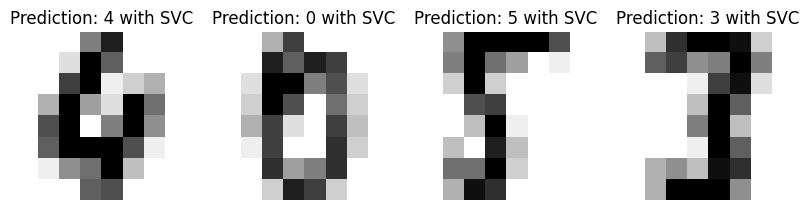

In [27]:
show_digits(X_test, y_test_pred_svc, "SVC")

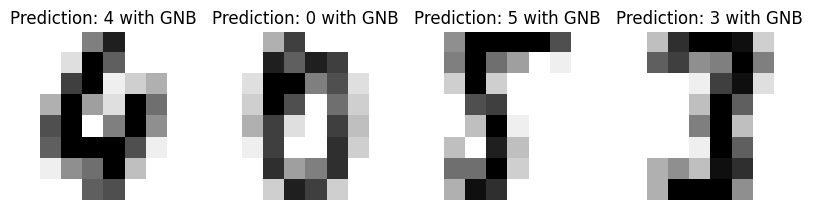

In [28]:
show_digits(X_test, y_test_pred_gnb, "GNB")

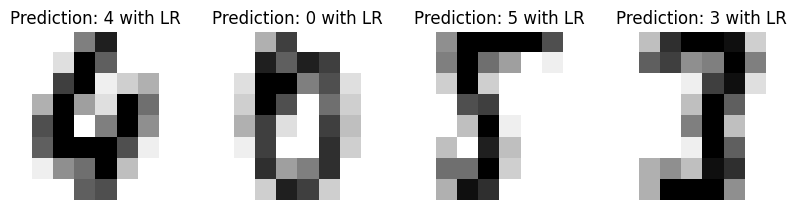

In [29]:
show_digits(X_test, y_test_pred_lr, "LR")

### According to these samples all classifiers predict the same

## Show the classification report for each model

In [30]:
from sklearn.metrics import classification_report

In [31]:
def show_clf_report(y, y_pred, model):
    print(
        f"Classification report for classifier {model}:\n"
        f"{classification_report(y, y_pred)}\n"
    )

In [32]:
show_clf_report(y_test, y_test_pred_svc, svc)

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        53
           1       0.96      1.00      0.98        53
           2       1.00      0.98      0.99        53
           3       0.96      0.89      0.92        53
           4       0.98      0.95      0.96        57
           5       0.95      0.98      0.96        56
           6       0.98      0.98      0.98        54
           7       1.00      1.00      1.00        54
           8       0.91      0.98      0.94        52
           9       0.96      0.96      0.96        55

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540




In [33]:
show_clf_report(y_test, y_test_pred_gnb, gnb)

Classification report for classifier GaussianNB():
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        53
           1       0.65      0.79      0.71        53
           2       0.98      0.81      0.89        53
           3       0.92      0.64      0.76        53
           4       1.00      0.86      0.92        57
           5       0.83      0.93      0.87        56
           6       0.96      0.98      0.97        54
           7       0.73      0.83      0.78        54
           8       0.59      0.71      0.64        52
           9       0.82      0.73      0.77        55

    accuracy                           0.83       540
   macro avg       0.84      0.82      0.83       540
weighted avg       0.84      0.83      0.83       540




In [34]:
show_clf_report(y_test, y_test_pred_lr, lr)

Classification report for classifier LogisticRegression(max_iter=1000):
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        53
           1       0.85      0.87      0.86        53
           2       0.96      0.98      0.97        53
           3       0.92      0.83      0.87        53
           4       0.96      0.86      0.91        57
           5       0.93      0.91      0.92        56
           6       0.88      0.98      0.93        54
           7       0.96      0.94      0.95        54
           8       0.86      0.85      0.85        52
           9       0.81      0.93      0.86        55

    accuracy                           0.91       540
   macro avg       0.91      0.91      0.91       540
weighted avg       0.91      0.91      0.91       540




### Looks like SVC has the best accuracy

## Plot a confusion matrix 

For each model, plot its confusion matric of the true digit values and the predicted digit values using the test set.

In [35]:
from sklearn.metrics import ConfusionMatrixDisplay

Text(0.5, 0.98, 'Confusion Matrix for SVC(gamma=0.001)')

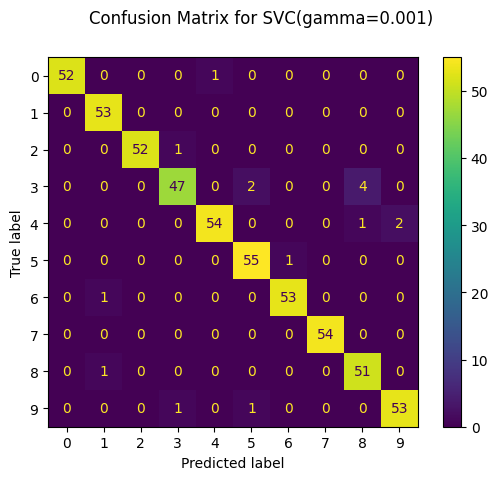

In [36]:
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_svc)
disp.figure_.suptitle(f"Confusion Matrix for {svc}")

Text(0.5, 0.98, 'Confusion Matrix for GaussianNB()')

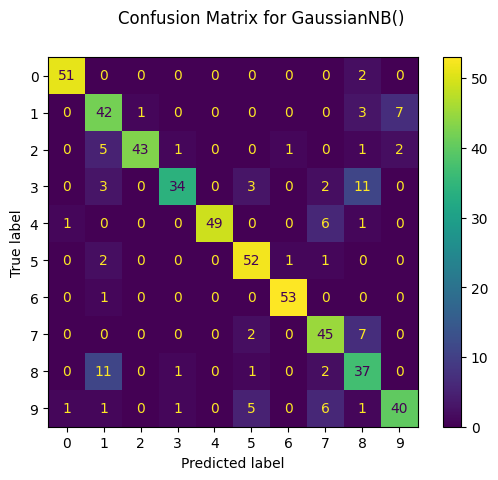

In [37]:
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_gnb)
disp.figure_.suptitle(f"Confusion Matrix for {gnb}")

Text(0.5, 0.98, 'Confusion Matrix for LogisticRegression(max_iter=1000)')

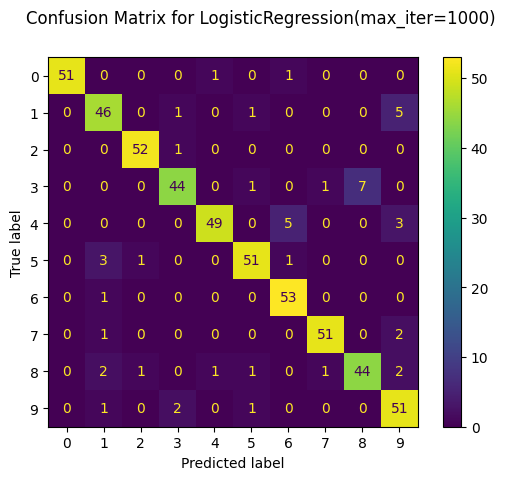

In [38]:
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_lr)
disp.figure_.suptitle(f"Confusion Matrix for {lr}")

# Prediction

Let's now do a prediction a new digit. This has the following 8x8 representation.

In [39]:
import numpy as np

In [50]:
digit = np.array([[ 0.,  0.,  0.,  2., 16., 16.,  2.,  0.],
       [ 0.,  0.,  0.,  4., 16., 16.,  2.,  0.],
       [ 0.,  1.,  4., 12., 16., 12.,  0.,  0.],
       [ 0.,  7., 16., 16., 16., 12.,  0.,  0.],
       [ 0.,  0.,  3., 10., 16., 14.,  0.,  0.],
       [ 0.,  0.,  0.,  8., 16., 12.,  0.,  0.],
       [ 0.,  0.,  0.,  6., 16., 16.,  2.,  0.],
       [ 0.,  0.,  0.,  2., 12., 15.,  4.,  0.]])

Try to predict which digit corresponds to. What your classifiers think?

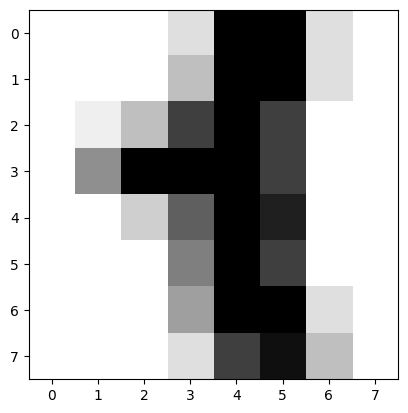

In [43]:
plt.imshow(digit, cmap='binary');

In [45]:
x = digit.ravel()

In [46]:
gnb.predict([x])[0]

np.int64(1)

In [47]:
svc.predict([x])[0]

np.int64(1)

In [48]:
lr.predict([x])[0]

np.int64(1)

### The actual target is:

In [55]:
digits.images[21]

array([[ 0.,  0.,  0.,  2., 16., 16.,  2.,  0.],
       [ 0.,  0.,  0.,  4., 16., 16.,  2.,  0.],
       [ 0.,  1.,  4., 12., 16., 12.,  0.,  0.],
       [ 0.,  7., 16., 16., 16., 12.,  0.,  0.],
       [ 0.,  0.,  3., 10., 16., 14.,  0.,  0.],
       [ 0.,  0.,  0.,  8., 16., 12.,  0.,  0.],
       [ 0.,  0.,  0.,  6., 16., 16.,  2.,  0.],
       [ 0.,  0.,  0.,  2., 12., 15.,  4.,  0.]])

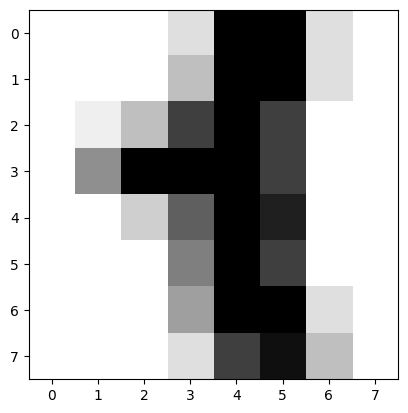

In [56]:
plt.imshow(digits.images[21], cmap='binary');

In [57]:
digits.target[21]

np.int64(1)

# Outstanding!